In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

calh = fetch_california_housing()
X = calh.data
y = calh.target
print(pd.DataFrame(X))

            0     1         2         3       4         5      6       7
0      8.3252  41.0  6.984127  1.023810   322.0  2.555556  37.88 -122.23
1      8.3014  21.0  6.238137  0.971880  2401.0  2.109842  37.86 -122.22
2      7.2574  52.0  8.288136  1.073446   496.0  2.802260  37.85 -122.24
3      5.6431  52.0  5.817352  1.073059   558.0  2.547945  37.85 -122.25
4      3.8462  52.0  6.281853  1.081081   565.0  2.181467  37.85 -122.25
...       ...   ...       ...       ...     ...       ...    ...     ...
20635  1.5603  25.0  5.045455  1.133333   845.0  2.560606  39.48 -121.09
20636  2.5568  18.0  6.114035  1.315789   356.0  3.122807  39.49 -121.21
20637  1.7000  17.0  5.205543  1.120092  1007.0  2.325635  39.43 -121.22
20638  1.8672  18.0  5.329513  1.171920   741.0  2.123209  39.43 -121.32
20639  2.3886  16.0  5.254717  1.162264  1387.0  2.616981  39.37 -121.24

[20640 rows x 8 columns]


{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [8]:
correlation_matrix = np.corrcoef(X.T)
print("***Correlation Matrix***")
print(pd.DataFrame(correlation_matrix))

***Correlation Matrix***
          0         1         2         3         4         5         6  \
0  1.000000 -0.119034  0.326895 -0.062040  0.004834  0.018766 -0.079809   
1 -0.119034  1.000000 -0.153277 -0.077747 -0.296244  0.013191  0.011173   
2  0.326895 -0.153277  1.000000  0.847621 -0.072213 -0.004852  0.106389   
3 -0.062040 -0.077747  0.847621  1.000000 -0.066197 -0.006181  0.069721   
4  0.004834 -0.296244 -0.072213 -0.066197  1.000000  0.069863 -0.108785   
5  0.018766  0.013191 -0.004852 -0.006181  0.069863  1.000000  0.002366   
6 -0.079809  0.011173  0.106389  0.069721 -0.108785  0.002366  1.000000   
7 -0.015176 -0.108197 -0.027540  0.013344  0.099773  0.002476 -0.924664   

          7  
0 -0.015176  
1 -0.108197  
2 -0.027540  
3  0.013344  
4  0.099773  
5  0.002476  
6 -0.924664  
7  1.000000  



Coefficients:
Feature 1: 0.436693293134325
Feature 2: 0.00943577803323845
Feature 3: -0.10732204139090426
Feature 4: 0.6450656935198124
Feature 5: -3.976389421180351e-06
Feature 6: -0.0037865426549710595
Feature 7: -0.421314377527144
Feature 8: -0.43451375467477726

Intercept: -36.94192020718445

Mean Squared Error: 0.5243209861846072



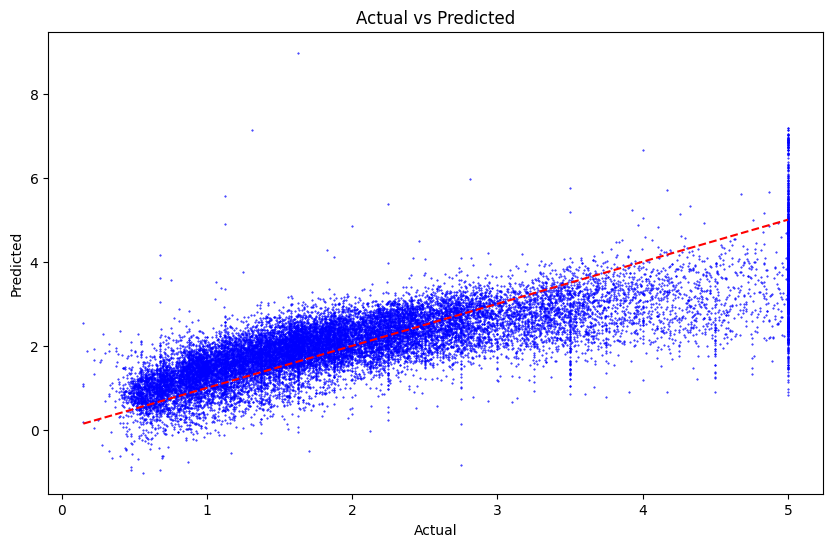

In [15]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)

coefficients = model.coef_
intercept = model.intercept_

print("\nCoefficients:")
for i, coef in enumerate(coefficients):
    print(f"Feature {i+1}: {coef}")
print(f"\nIntercept: {intercept}")

predictions = model.predict(X)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y, predictions)
print(f"\nMean Squared Error: {mse}")
print("")
plt.figure(figsize=(10, 6))
plt.scatter(y, predictions, color='blue', s=0.2)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.title('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()